In [88]:
# Importa as bibliotecas necessárias
%run '~/git/Bibliotecas.ipynb'

# Importação

In [96]:
# Carrega a base de dados contendo os registros de importação de fertilizantes
q=pd.read_csv('~/git/Pricing-Fertilizer-take-Rains-into-account/temp/q.csv')
q

,CO_ANO,CO_MES,KG_LIQUIDO,KG_LIQUIDO_pred_mm,KG_LIQUIDO_pred_s_mm,erro_mm,erro_s_mm,train_size_anos,ad
0,2007,8,53557361.0,58213561,62620730,4656200.0,9063369.0,5.0,1
1,2007,8,53557361.0,57891088,63464092,4333727.0,9906731.0,5.0,2
2,2007,8,53557361.0,60822722,60682063,7265361.0,7124702.0,5.0,5
3,2008,1,46410648.0,49772320,44668616,3361672.0,1742032.0,5.0,1
4,2008,1,46410648.0,43149520,47889064,3261128.0,1478416.0,5.0,3
...,...,...,...,...,...,...,...,...,...
1848,2024,1,121343414.0,182520365,138302495,61176951.0,16959081.0,10.0,8
1849,2024,1,121343414.0,176331108,145783286,54987694.0,24439872.0,11.0,8
1850,2024,1,121343414.0,175199927,141412057,53856513.0,20068643.0,12.0,8
1851,2024,1,121343414.0,178820983,148320066,57477569.0,26976652.0,13.0,8


In [97]:
q['dif']=q.erro_s_mm-q.erro_mm

In [98]:
q.groupby('CO_ANO').dif.count()

CO_ANO
2007     11
2008     26
2009     20
2010     35
2011     51
2012     88
2013    106
2014     89
2015    118
2016    161
2017    128
2018    250
2019    180
2020    150
2021    130
2022    150
2023    150
2024     10
Name: dif, dtype: int64

In [99]:
q=q[q.CO_ANO!=2024]

In [100]:
q.groupby('CO_MES').dif.count()

CO_MES
1     167
2     253
3     250
4     162
5     134
6     118
7     115
8     120
9     116
10    157
11    115
12    136
Name: dif, dtype: int64

In [101]:
q.groupby('CO_MES').dif.mean().astype(int).sort_values()

CO_MES
6    -2776524
5    -2114393
11    -465750
4      286444
12    1581640
8     1933822
7     2691333
3     3670456
9     4279027
10    4941859
2     5115095
1     5665731
Name: dif, dtype: int64

In [102]:
q=q[q.CO_MES==2]

In [103]:
q.groupby('ad').dif.count()

ad
5     32
6     50
7     64
8    107
Name: dif, dtype: int64

In [104]:
q.groupby('ad').dif.mean().astype(int).sort_values()

ad
5    -1415605
6     2901622
8     4967234
7    10356929
Name: dif, dtype: int64

In [105]:
q=q[q.ad==7]

In [106]:
q.groupby('train_size_anos').dif.count()

train_size_anos
5.0     9
6.0     8
7.0     8
8.0     8
9.0     7
10.0    6
11.0    5
12.0    5
13.0    4
14.0    4
Name: dif, dtype: int64

In [107]:
q.groupby('train_size_anos').dif.mean().astype(int).sort_values()

train_size_anos
12.0     6296592
5.0      6314775
10.0     8169366
6.0      8988596
7.0     10840219
9.0     11276068
11.0    11363174
8.0     11851536
13.0    16837804
14.0    17242231
Name: dif, dtype: int64

In [108]:
q=q[q.train_size_anos==5]

In [109]:
q

,CO_ANO,CO_MES,KG_LIQUIDO,KG_LIQUIDO_pred_mm,KG_LIQUIDO_pred_s_mm,erro_mm,erro_s_mm,train_size_anos,ad,dif
219,2008,2,14695417.0,38580318,35977605,23884901.0,21282188.0,5.0,7,-2602713.0
231,2012,2,8694785.0,23326515,26706719,14631730.0,18011934.0,5.0,7,3380204.0
252,2013,2,12115066.0,20368726,28049895,8253660.0,15934829.0,5.0,7,7681169.0
311,2018,2,37623692.0,55750554,83343207,18126862.0,45719515.0,5.0,7,27592653.0
341,2019,2,41055926.0,123235073,131822984,82179147.0,90767058.0,5.0,7,8587911.0
439,2015,2,59803933.0,51314754,63874325,8489179.0,4070392.0,5.0,7,-4418787.0
530,2020,2,67158087.0,98879166,102396185,31721079.0,35238098.0,5.0,7,3517019.0
560,2023,2,66172521.0,78317688,92090154,12145167.0,25917633.0,5.0,7,13772466.0
582,2011,2,5957710.0,22913795,22236850,16956085.0,16279140.0,5.0,7,-676945.0


In [110]:
m=q.dif.mean()

In [111]:
s=q.dif.std()

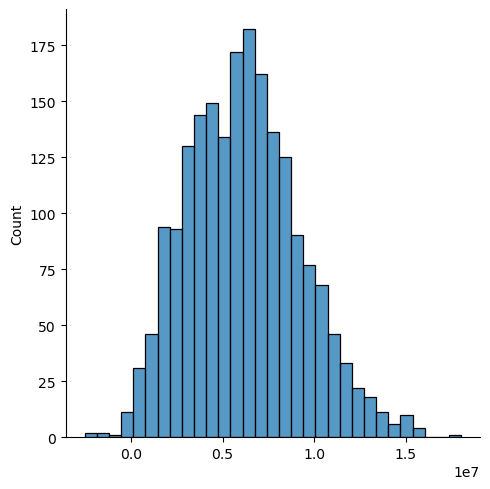

In [183]:
import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(2000):
    so_boot_distn.append(q.sample(frac=1, replace=True)['dif'].mean())

sns.displot(so_boot_distn)

In [184]:
m=np.mean(so_boot_distn)
s=np.std(so_boot_distn)

In [185]:
z_score=(0-m)/s
z_score

-2.0027075470790923

In [186]:
from scipy.stats import norm

In [191]:
1-norm.cdf(z_score,loc=0,scale=1)

0.9773956558734979

In [38]:
q.to_csv('~/git/Pricing-Fertilizer-take-Rains-into-account/temp/q1.csv', index=False)